<div dir="center">
  <h1 align="center" style="line-height:200%;font-family:vazir;color:#0099cc">
    <font face="vazir" color="#0099cc">
      Sentiment Explorer
    </font>
  </h1>
</div>

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  In this exciting project, my task was to preprocess Persian text data and prepare it for training a sentiment classification model. This project served as an exceptional opportunity to challenge my skills and put into practice the knowledge I had acquired so far. The success of the project depended heavily on the quality of the prepared data, and I was determined to ensure that the preprocessing phase was handled with precision and care.
</p>

------

<h1 dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  <font face="Times New Roman" color="#0099cc" size="4">
    Project Phases:
  </font>
</h1>

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  The project was carried out in three main stages:
  <div dir="ltr">
    <ul>
        <li><strong>Analysis of the Training Dataset:</strong>
        <ul>
          <li>Data Cleaning: Removal of redundant or irrelevant entries.</li>
          <li>Dataset Preprocessing: Converting categorical sentiment labels into numerical values.</li>
        </ul>
      <li><strong>Text Preprocessing:</strong>
        <ul>
          <li>Normalization: Applying Persian text normalization techniques.</li>
          <li>Tokenization: Splitting text into words or sentences.</li>
          <li>Number Removal: Eliminating both Persian and Latin numerals.</li>
          <li>Punctuation Removal: Removing punctuation marks such as <code>?</code>, <code>!</code>, etc.</li>
          <li>Stopword Removal: Filtering out high-frequency, low-importance words.</li>
          <li>Stemming: Reducing words to their root forms.</li>
          <li>Extra Space Removal: Ensuring consistent word and sentence spacing.</li>
        </ul>
      </li>
      <li><strong>Word Embedding:</strong>
        <ul>
          <li>Using <code>Word2Vec</code> to transform words into numerical vector representations.</li>
          <li>Analyzing word similarity based on embeddings.</li>
        </ul>
      </li>
      <li><strong>Preparation for Analysis:</strong>
        <ul>
          <li>Storing preprocessed data and embeddings for later use in machine learning models.</li>
        </ul>
      </li>
      <li><strong>Sentiment Classification Model Training:</strong>
        <ul>
          <li>Data Splitting: Dividing the dataset into <code>Train</code> and <code>Validation</code> subsets.</li>
          <li>Model Training: Using Logistic Regression to train the sentiment classifier.</li>
          <li>Model Evaluation: Assessing performance on the validation dataset.</li>
        </ul>
      </li>
      <li><strong>Project Evaluation File Preparation:</strong>
        <ul>
          <li>Prediction on <code>Test</code> data: Predicting sentiment labels for the test dataset.</li>
          <li>Creating the final evaluation file for submission.</li>
        </ul>
      </li>
    </ul>
  </div>
</p>

-----------

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  <font face="Times New Roman" size="3">
    Due to the need for quality assurance and considering my current proficiency level in <strong>data analysis</strong>, <strong>data preprocessing</strong>, and <strong>machine learning</strong>, certain core stages of the project were handled by the project team. These included:
    <div dir="ltr">
      <ul>
        <li><strong>Analysis of the Training Dataset:</strong> Performing initial data exploration and extracting relevant insights.</li>
        <li><strong>Preparation for Analysis:</strong> Establishing an optimal framework for efficient data utilization.</li>
        <li><strong>Sentiment Classification Model Training:</strong> Implementing and optimizing the machine learning model.</li>
        <li><strong>Evaluation File Preparation:</strong> Compiling the final evaluation report for performance assessment.</li>
      </ul>
    </div>
  </font>
</p>

----------------

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  Now it was time to demonstrate my skills and successfully overcome this challenge. I approached the project with diligence and determination to meet the required standards, and I am confident in the robustness of the prepared dataset and preprocessing pipeline.
</p>


<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  To begin the work, I placed the two dataset files, <code>train.csv</code> and <code>test.csv</code>, in the <code>data</code> directory. As the first step, I imported these files into my programming environment using the following commands:
</p>


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')


<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  The datasets provided to me had already undergone a cleaning process, ensuring that no redundant or irrelevant entries were present. However, in order to gain a better understanding of the dataset, I decided to extract some useful insights using the following commands. These insights included the distribution of comments that recommended a purchase versus those that did not, as well as the overall structure of the dataset.<br>
  This information helped me develop a clearer understanding of the data and prepared me for the subsequent stages of the project.
</p>


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149400 entries, 0 to 149399
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   body                   149400 non-null  object
 1   recommendation_status  149400 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    600 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


In [58]:
train_data['recommendation_status'].value_counts()

recommendation_status
not_recommended    49800
recommended        49800
no_idea            49800
Name: count, dtype: int64

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  Upon examining the data in the <code>recommendation_status</code> column, I found that its current format was not suitable for training machine learning models, as these algorithms require numerical input. Therefore, the next step was to convert the values in this column into numerical form, specifically <code>0</code> and <code>1</code>, so they could be utilized effectively by the models.  
  To accomplish this transformation, I used the following commands:
</p>


In [59]:
train_data["recommendation_status"] = train_data["recommendation_status"].map({"no_idea": 2,"recommended": 1, "not_recommended": 0})

In [60]:
train_data["recommendation_status"].unique()

array([0, 1, 2])

In [61]:
train_data["recommendation_status"].value_counts()

recommendation_status
0    49800
1    49800
2    49800
Name: count, dtype: int64

/var/folders/rf/x4s3m6qd51gcvc25nv1bpdl40000gn/T/ipykernel_4035/2317363093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[label_names[i] for i in label_counts.index], y=label_counts.values, palette="Blues")


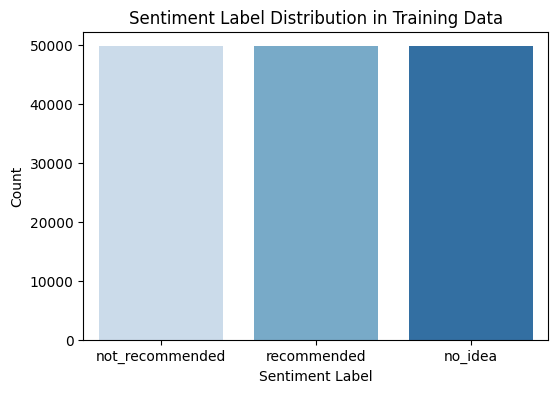

In [62]:
# Count of each sentiment label
label_counts = train_data['recommendation_status'].value_counts().sort_index()
label_names = {0: 'not_recommended', 1: 'recommended', 2: 'no_idea'}

plt.figure(figsize=(6,4))
sns.barplot(x=[label_names[i] for i in label_counts.index], y=label_counts.values, palette="Blues")
plt.title("Sentiment Label Distribution in Training Data")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

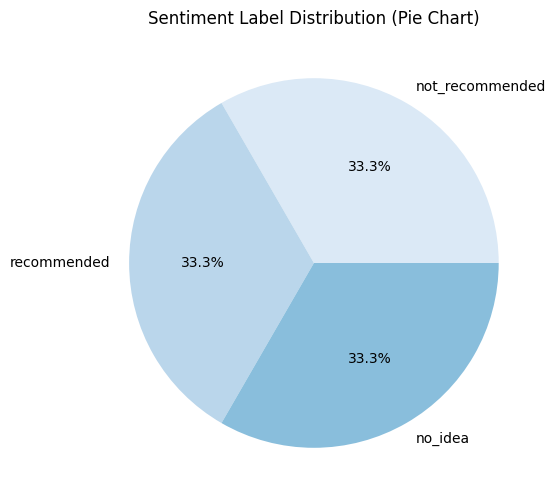

In [63]:
# Pie chart of sentiment label distribution
plt.figure(figsize=(6,6))
plt.pie(label_counts.values, labels=[label_names[i] for i in label_counts.index], autopct='%1.1f%%', colors=sns.color_palette("Blues"))
plt.title("Sentiment Label Distribution (Pie Chart)")
plt.show()

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  At this stage, it was my turn to take action. Using the knowledge and tools I had learned so far, I implemented the required preprocessing steps for the Persian language in the form of a function named <code>preprocess_text</code>.  
  This function was designed to perform all preprocessing operations mentioned at the beginning of the project, including text normalization, tokenization, stopword removal, stemming, and other necessary steps.  
  The <code>preprocess_text</code> function could then be applied to any text input, enabling me to preprocess my dataset effectively for the subsequent stages of the project.  
  Below is an example demonstrating the expected behavior of this function:
</p>

**Input:**
<pre>
  <code>
example = "من متولد سال ۱۳۷۷ هستم"
preprocess_text(example)
  </code>
</pre>

**Output:**
<pre>
  <code>
['متولد', 'سال', 'هس']
  </code>
</pre>


In [64]:
!pip install hazm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [65]:
import re
import string
import hazm
from hazm import Normalizer, Stemmer, Lemmatizer, word_tokenize
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()



In [66]:
def preprocess_text(text):
    text = normalizer.normalize(text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  After completing the implementation of the preprocessing function, the next step was to apply this operation to all the reviews stored in the <code>train_data</code> dataset so that they would be ready for reference by the <code>Word2Vec</code> model.  
  The preprocessed data was then stored in a new column named <code>preprocess</code> for future use.
</p>


In [67]:
dataes = train_data['body']

In [68]:
data_processed = dataes.apply(preprocess_text)

In [69]:
train_data["preprocess"] = data_processed
train_data.head()

,body,recommendation_status,preprocess
0,جنسش‌خوب‌بود‌خیلی‌بدبدبود,0,[جنسش‌خوب‌بود‌خیلی‌بدبدبود]
1,به کار میاد شک ندارم,1,"[به, کار, میاد, شک, ندار]"
2,چیزی ک توعکسه واست میفرستن ولی هم جنسش خوب نیس...,2,"[چیز, ک, توعکسه, واس, میفرستن, ول, ه, جنس, خوب..."
3,رنگش خیلی خوبه . براق هم هست و زود خشک میشه . ...,2,"[رنگ, خیل, خوبه, براق, ه, هس, و, زود, خشک, میش..."
4,من مرجوع کردم قسمت پاچه شلوار برام تنگ بود ولی...,2,"[من, مرجوع, کرد, قسم, پاچه, شلوار, برا, تنگ, ب..."


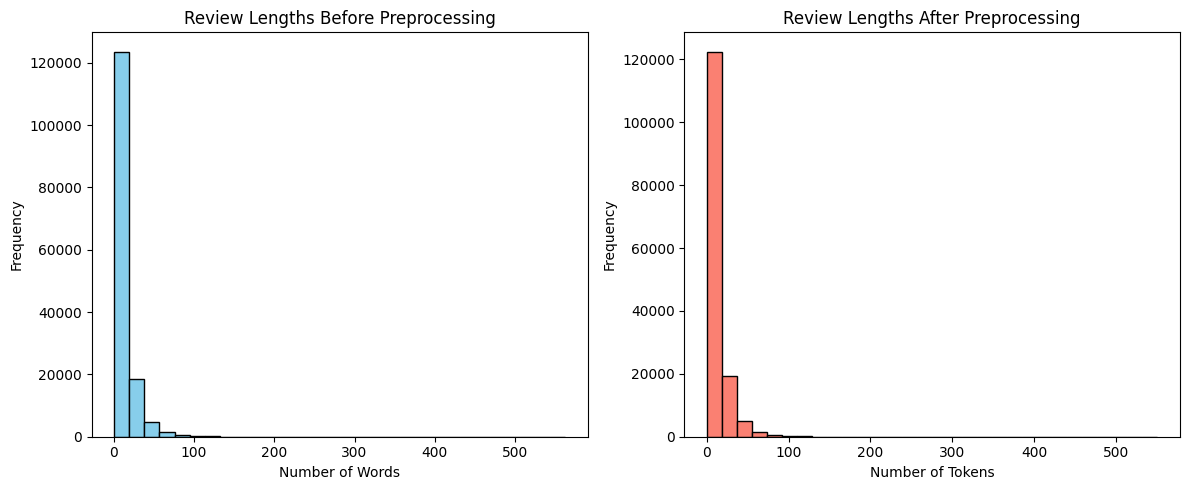

In [70]:
# Calculate review lengths before preprocessing
review_lengths_before = train_data['body'].apply(lambda x: len(str(x).split()))

# Calculate review lengths after preprocessing
review_lengths_after = train_data['preprocess'].apply(len)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(review_lengths_before, bins=30, color='skyblue', edgecolor='black')
plt.title("Review Lengths Before Preprocessing")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(review_lengths_after, bins=30, color='salmon', edgecolor='black')
plt.title("Review Lengths After Preprocessing")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

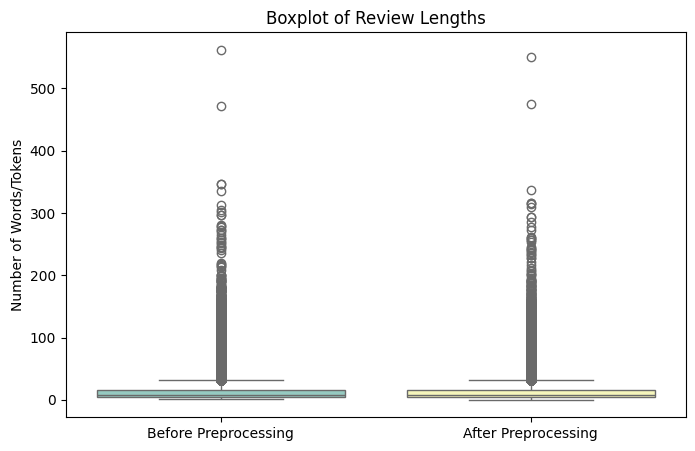

In [71]:
# Boxplot of review lengths before and after preprocessing
plt.figure(figsize=(8,5))
sns.boxplot(data=[review_lengths_before, review_lengths_after], palette="Set3")
plt.xticks([0,1], ["Before Preprocessing", "After Preprocessing"])
plt.ylabel("Number of Words/Tokens")
plt.title("Boxplot of Review Lengths")
plt.show()

/var/folders/rf/x4s3m6qd51gcvc25nv1bpdl40000gn/T/ipykernel_4035/1336703281.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


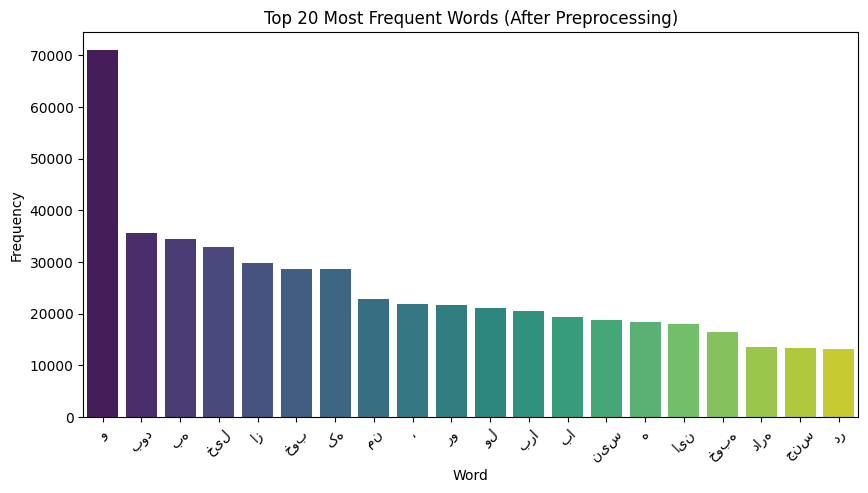

In [72]:
from collections import Counter

# Flatten all tokens into a single list
all_tokens = [token for tokens in train_data['preprocess'] for token in tokens]
word_freq = Counter(all_tokens)
most_common = word_freq.most_common(20)

words, counts = zip(*most_common)

plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 20 Most Frequent Words (After Preprocessing)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

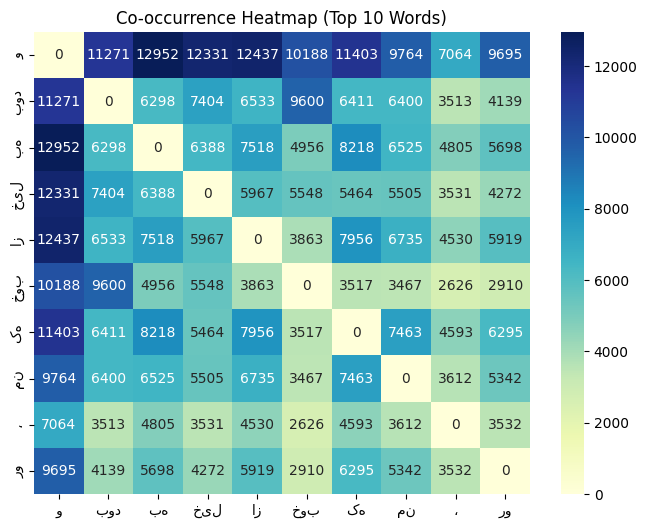

In [73]:
# Heatmap of word co-occurrence (top 10 frequent words)
import numpy as np
top_words = [w for w, _ in most_common[:10]]
co_matrix = np.zeros((10,10))
for tokens in train_data['preprocess']:
    for i, w1 in enumerate(top_words):
        if w1 in tokens:
            for j, w2 in enumerate(top_words):
                if w2 in tokens and i != j:
                    co_matrix[i, j] += 1
plt.figure(figsize=(8,6))
sns.heatmap(co_matrix, xticklabels=top_words, yticklabels=top_words, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Co-occurrence Heatmap (Top 10 Words)")
plt.show()

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  With the preprocessing applied to the data and the results stored, the next step was to perform word embedding using the <code>Word2Vec</code> algorithm.  
  In this stage, I implemented the <code>Word2Vec</code> model to train on the preprocessed dataset and convert each word into its corresponding numerical vector representation.
</p>


In [74]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=train_data['preprocess'], vector_size=100, window=5, min_count=1, workers=4)

In [75]:
print(list(model.wv.key_to_index.keys())[:20])  # First 20 words

['و', 'بود', 'به', 'خیل', 'از', 'خوب', 'که', 'من', '،', 'رو', 'ول', 'برا', 'با', 'نیس', 'ه', 'این', 'خوبه', 'داره', 'جنس', 'در']


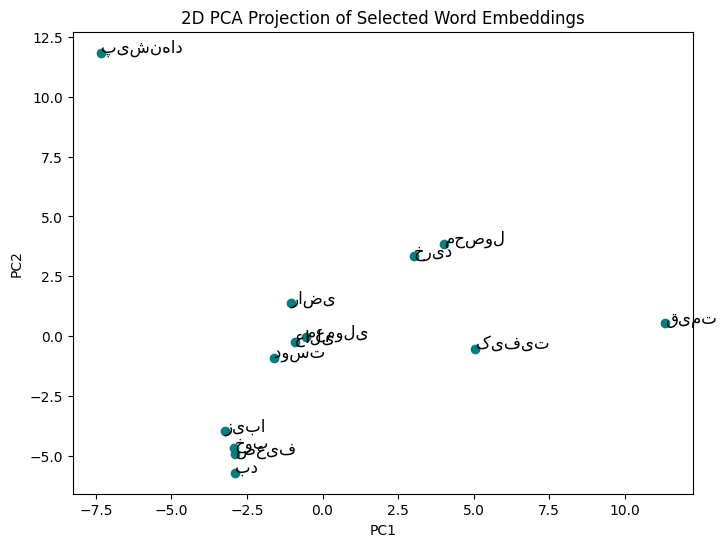

In [76]:
from sklearn.decomposition import PCA

# Select a set of interesting words to visualize
words_to_plot = ['دوست', 'خوب', 'بد', 'عالی', 'راضی', 'کیفیت', 'محصول', 'پیشنهاد', 'خرید', 'قیمت', 'زیبا', 'ضعیف', 'معمولی']

# Get vectors for these words
word_vectors = [model.wv[word] for word in words_to_plot if word in model.wv]
words_present = [word for word in words_to_plot if word in model.wv]

# Reduce to 2D
pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(8,6))
plt.scatter(vecs_2d[:,0], vecs_2d[:,1], color='teal')
for i, word in enumerate(words_present):
    plt.text(vecs_2d[i,0]+0.01, vecs_2d[i,1]+0.01, word, fontsize=12)
plt.title("2D PCA Projection of Selected Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  Next, I tested the trained <code>Word2Vec</code> model to find the words most similar to the word "دوست" ("friend").  
  I then examined and analyzed the resulting output to assess the model’s ability to capture semantic similarities between words.
</p>


In [77]:
model.wv.most_similar("دوست")

[('دوسشون', 0.8900439739227295),
 ('دوستشون', 0.8476244211196899),
 ('دوس', 0.7862527370452881),
 ('اومدودوس', 0.7158078551292419),
 ('عم', 0.7087499499320984),
 ('اصرار', 0.7026592493057251),
 ('قابلیتو', 0.6853565573692322),
 ('کارتخو', 0.6766228675842285),
 ('دوسس', 0.6678687930107117),
 ('زاین', 0.6637812852859497)]

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  At this stage, I designed the <code>sentence_vector</code> function to compute the embedding vector for each review.  
  The purpose of this function is to calculate the average of the word vectors within a review and generate a single unified vector representing the entire sentence.
</p>


In [78]:
import numpy as np

In [79]:
def sentence_vector(sentence):
    vectors = []
    for word in sentence:
        try:
            vectors.append(model.wv[word])
        except KeyError:
            vectors.append(np.zeros(100))  
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)


<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  Now that the <code>sentence_vector</code> function has been defined, I applied it to the <code>train_data['preprocess']</code> column.  
  The resulting sentence-level vectors were stored in a variable named <code>sentence_vectors</code>.  
  At this point, each review was successfully transformed into a corresponding vector, ready to be fed into the classification model.
</p>

<div dir="ltr" style="text-align: left;">
  <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">
# Applying the sentence_vector function to the preprocessed data
sentence_vectors = train_data['preprocess'].apply(sentence_vector)
  </pre>
</div>


In [80]:
sentence_vectors = train_data['preprocess'].apply(sentence_vector)
sentence_vectors

0         [-0.008517253, -0.0070543014, 0.0036804832, 0....
1         [-0.24024348, 0.49235582, 0.60265845, 0.410495...
2         [0.17536782, 0.5767703, 0.21527517, 0.13107234...
3         [0.20505013, 0.7619411, 0.6169029, 0.15201089,...
4         [0.15009633, 1.0309824, 0.41707757, 0.60997415...
                                ...                        
149395    [-0.79184556, 0.70300823, 0.14340104, -0.18275...
149396    [0.28490788, 0.82492846, 0.44934437, 0.2086259...
149397    [-0.5234065, 0.99661636, 0.86404794, 0.3958220...
149398    [0.861774, 0.48955366, -0.13369717, 0.35826215...
149399    [0.36020207, 1.2179978, 0.24107568, 0.2747866,...
Name: preprocess, Length: 149400, dtype: object

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  In this step, I used the <code>train_test_split</code> function to divide the data into training and evaluation sets.  
  The data was split in such a way that 80% was allocated for training and 20% for evaluation.  
  Here, <code>X</code> represents the embedded sentence vectors for each review, and <code>y</code> contains the target labels, which correspond to the <code>recommendation_status</code> column.
</p>

<div dir="ltr" style="text-align: left;">
  <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">
from sklearn.model_selection import train_test_split
# Converting sentence vectors to a NumPy array
X = np.array(sentence_vectors.to_list())
# Assuming df["recommendation_status"] contains the target labels
y = df["recommendation_status"].values
# Splitting the data into training and evaluation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  </pre>
</div>


In [81]:
from sklearn.model_selection import train_test_split

X = np.array(sentence_vectors.to_list())

y = train_data["recommendation_status"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

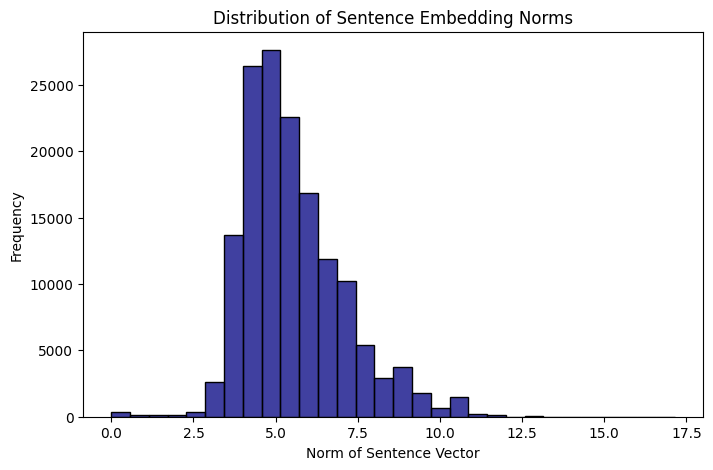

In [82]:
# 4. Distribution of Sentence Embedding Norms
sentence_norms = np.linalg.norm(X, axis=1)
plt.figure(figsize=(8,5))
sns.histplot(sentence_norms, bins=30, color='navy')
plt.title("Distribution of Sentence Embedding Norms")
plt.xlabel("Norm of Sentence Vector")
plt.ylabel("Frequency")
plt.show()

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  After preparing and splitting the dataset into training and evaluation sets, the next step was to train the model.  
  In this project, I used the <i>Logistic Regression</i> algorithm for sentiment classification.  
  The model was trained using the <code>fit</code> method, applied to the training data <code>X_train</code> and <code>y_train</code>.
</p>

<div dir="ltr" style="text-align: left;">
  <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
logistic_model.fit(X_train, y_train)
  </pre>
</div>


In [83]:

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  After training the model, the next step was to evaluate its performance.  
  In this stage, I used the evaluation data <code>X_test</code> to generate predictions, and then measured the model’s accuracy using the <code>accuracy_score</code> function.  
  Finally, the model's accuracy was printed. The minimum acceptable threshold for accuracy was set at 50%.
</p>

<div dir="ltr" style="text-align: left;">
  <pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">
from sklearn.metrics import accuracy_score
# Generating predictions using the evaluation data
y_pred = logistic_model.predict(X_test)
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
  </pre>
</div>


In [84]:
from sklearn.metrics import accuracy_score

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.670615796519411


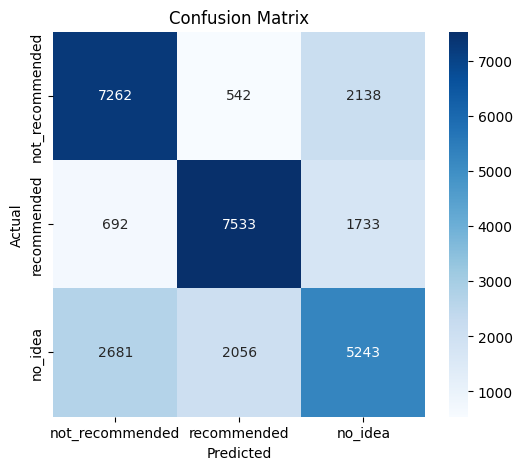

In [85]:
# Confusion matrix for model predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[label_names[i] for i in sorted(label_names)], yticklabels=[label_names[i] for i in sorted(label_names)])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

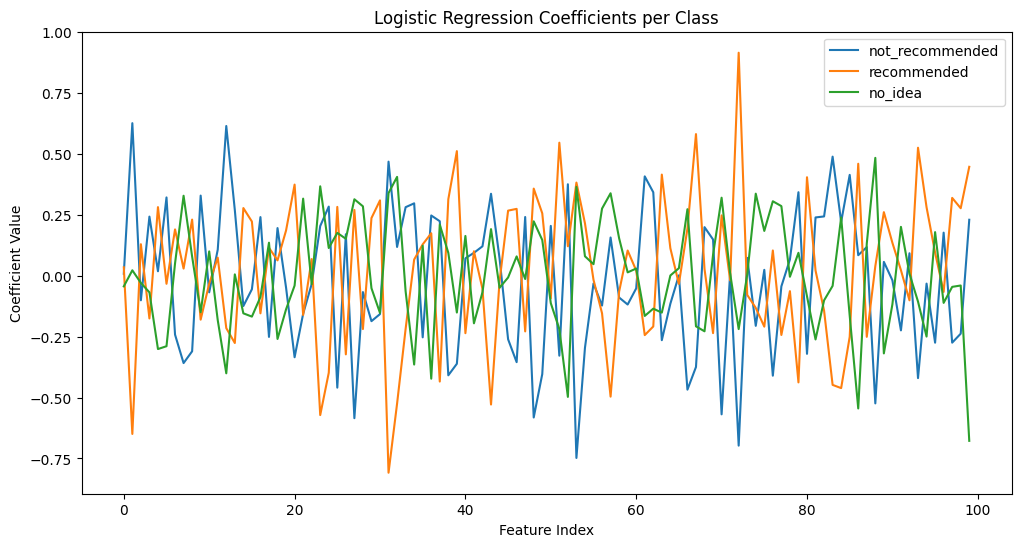

In [86]:
# Feature Importance (Logistic Regression coefficients)
importances = logistic_model.coef_
plt.figure(figsize=(12,6))
for i, name in enumerate([label_names[i] for i in sorted(label_names)]):
    plt.plot(importances[i], label=name)
plt.title("Logistic Regression Coefficients per Class")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

In [87]:
# Error Analysis: Misclassified Samples
misclassified_idx = np.where(y_test != y_pred)[0]
print("Sample misclassified reviews and their true/predicted labels:")
for idx in misclassified_idx[:5]:
    print("Review:", train_data.iloc[X_test[idx]].body)
    print("True:", label_names[y_test[idx]], "Predicted:", label_names[y_pred[idx]])
    print("---")

Sample misclassified reviews and their true/predicted labels:
Review: 0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
               ...            
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
0    جنسش‌خوب‌بود‌خیلی‌بدبدبود
Name: body, Length: 100, dtype: object
True: recommended Predicted: no_idea
---
Review: 0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
                    ...            
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
149399      عکسش بزرگتر از خودش بود
1              به کار میاد شک ندارم
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
0         جنسش‌خوب‌بود‌خیلی‌بدبدبود
Name: body, Length: 100, dtype: object
True: no_idea Predicted: recommended
---
Review: 0    جنسش‌خوب‌بود

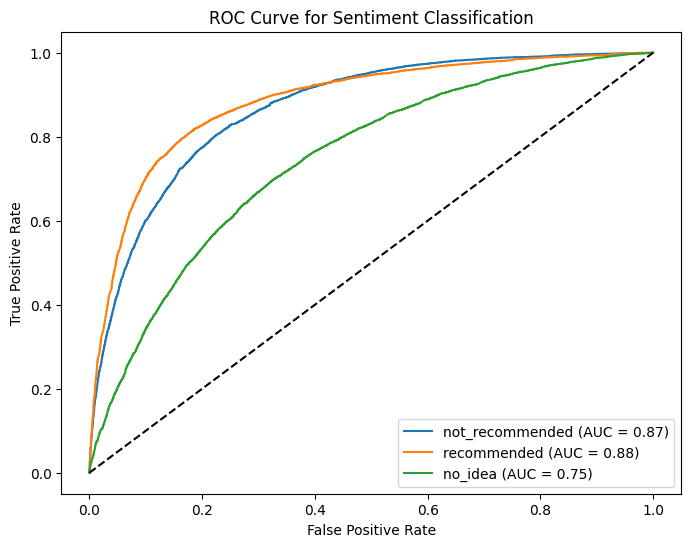

In [88]:

# ROC Curve for Multi-class Classification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = logistic_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8,6))
for i, name in label_names.items():
    plt.plot(fpr[i], tpr[i], label=f"{name} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve for Sentiment Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


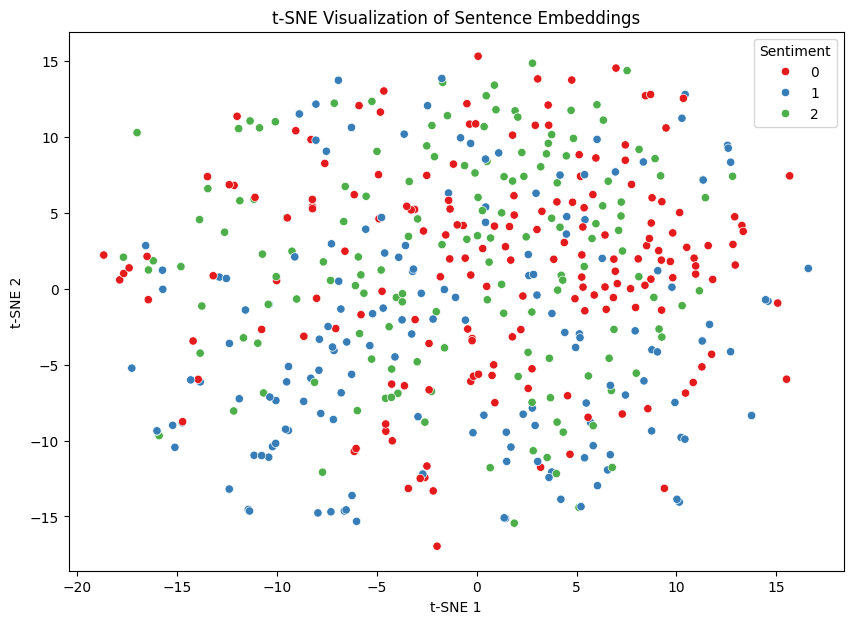

In [89]:
# 2. t-SNE Visualization of Sentence Embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
sentence_vecs_2d = tsne.fit_transform(X[:500])  # Use a subset for speed
plt.figure(figsize=(10,7))
sns.scatterplot(x=sentence_vecs_2d[:,0], y=sentence_vecs_2d[:,1], hue=y[:500], palette="Set1", legend="full")
plt.title("t-SNE Visualization of Sentence Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Sentiment")
plt.show()

/var/folders/rf/x4s3m6qd51gcvc25nv1bpdl40000gn/T/ipykernel_4035/297123201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train', 'Test'], y=[train_accuracy, test_accuracy], palette="Set2")


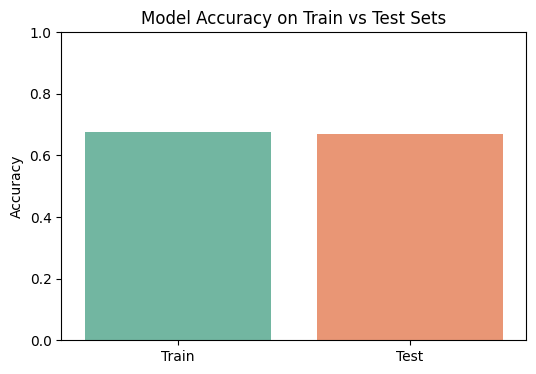

In [90]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy (already computed)
test_accuracy = accuracy

plt.figure(figsize=(6,4))
sns.barplot(x=['Train', 'Test'], y=[train_accuracy, test_accuracy], palette="Set2")
plt.ylim(0,1)
plt.title("Model Accuracy on Train vs Test Sets")
plt.ylabel("Accuracy")
plt.show()

In [91]:
# 3. Precision, Recall, F1-score per class
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=[label_names[i] for i in sorted(label_names)])
print(report)

                 precision    recall  f1-score   support

not_recommended       0.68      0.73      0.71      9942
    recommended       0.74      0.76      0.75      9958
        no_idea       0.58      0.53      0.55      9980

       accuracy                           0.67     29880
      macro avg       0.67      0.67      0.67     29880
   weighted avg       0.67      0.67      0.67     29880



<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium;">  
  In this section, I used the <code>predict_recommendation</code> function to classify new reviews.  
  This function processes the input review, converts it into an embedding vector, and then uses the trained model to predict the class of the review.  
  It returns one of the following three outcomes:  
  <ul>  
    <li><code>recommended</code></li>  
    <li><code>not_recommended</code></li>  
    <li><code>no_idea</code></li>  
  </ul>  
</p>  

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium;">  
  To accomplish this task, I followed the steps below:  
</p>  

<ol dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium;">  
  <li>Defined a new review. For example:  
</ol>  

<div dir="ltr" style="text-align: left;">  
<pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">  
comment = "این محصول فوق‌العاده بود و واقعاً از خریدم راضی‌ام!"  
</pre>  
</div>  

<ol dir="ltr" start="2" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium;">  
  <li>Called the <code>predict_recommendation</code> function and stored the result:  
</ol>  

<div dir="ltr" style="text-align: left;">  
<pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">  
result = predict_recommendation(comment)  
print(result)  
</pre>  
</div>  

<ol dir="ltr" start="3" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium;">  
  <li>Tested several other reviews with different sentiments (positive, negative, and neutral), and evaluated the model's output. For instance:  
</ol>  

<div dir="ltr" style="text-align: left;">  
<pre style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; font-size: 14px; font-family: monospace; overflow: auto;">  
print(predict_recommendation("کیفیت این محصول بسیار پایین بود و اصلاً راضی نیستم."))  
print(predict_recommendation("محصول معمولی بود، نه خوب و نه بد."))  
</pre>  
</div>  

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium;">  
  My objective here was to assess the model’s performance by testing various review inputs and analyzing the differences in predictions.  
  By modifying the review texts, I was also able to gain a deeper understanding of how natural language processing affected the outcome.
</p>  


In [92]:
def predict_recommendation(comment):
    preprocessed_comment = preprocess_text(comment)
    
    comment_vector = sentence_vector(preprocessed_comment)
    
    comment_vector = comment_vector.reshape(1, -1)
    
    prediction = logistic_model.predict(comment_vector)
    
    return prediction[0]

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:Times New Roman;font-size:medium">
  In the final prediction step, I applied the implemented function to the reviews in the <code>test</code> dataset.  
  The predicted classes for each review were stored in a DataFrame named <code>submission</code>.  
  This DataFrame was structured as shown below, containing a single column named <code>class</code> that specifies the predicted sentiment class for each review.  
  This file directly influences the final evaluation of the project.
</p>

<table class="center" style="border-collapse: collapse; width: 30%; text-align: center; font-family: Times New Roman; font-size: medium;">
  <tr style="background-color: #e0e0e0;">
    <th style="border: 1px solid #ccc; padding: 8px;">class</th>
  </tr>
  <tr>
    <td style="border: 1px solid #ccc; padding: 8px;">not_recommended</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ccc; padding: 8px;">not_recommended</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ccc; padding: 8px;">recommended</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ccc; padding: 8px;">...</td>
  </tr>
</table>


In [93]:
pre = test_data['body'].apply(predict_recommendation)
submission = pd.DataFrame({'class':pre})
submission = submission.replace({0: 'not_recommended', 1: 'recommended', 2: 'no_idea'})
submission

,class
0,recommended
1,no_idea
2,no_idea
3,recommended
4,recommended
...,...
595,recommended
596,recommended
597,not_recommended
598,no_idea


<h2 align="right" style="line-height:200%;font-family:Times New Roman;color:#0099cc">
  <font face="Times New Roman" color="#0099cc">
    <b>Answer Packaging Cell</b>
  </font>
</h2>

<p dir="ltr" style="direction: ltr; text-align: justify; line-height:200%; font-family:Times New Roman; font-size:medium">
  To generate the <code>result.zip</code> file, I executed the following cell.  
  Please make sure that all recent changes in the notebook are saved (<code>Ctrl+S</code>) before running this cell, so that your code can be reviewed if support is needed.
</p>


In [94]:
import os

In [95]:
import zipfile
import joblib
 
if not os.path.exists(os.path.join(os.getcwd(), 'persian_comments_preprocessing.ipynb')):
    %notebook -e initial.ipynb


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ['persian_comments_preprocessing.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['persian_comments_preprocessing.ipynb', 'submission.csv']
